In [4]:
import pandas as pd
import os
import math      
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import time
import warnings 
import seaborn as sns 
warnings.filterwarnings('ignore') 

In [5]:
# 读取数据
# B_data=pd.read_csv("../../dataSet/B_data_time.csv")
T_data=pd.read_csv("../../dataSet/T_data_time.csv")

In [16]:
# B_data[B_data["Result"]=="E.Insuffi."].to_csv("../dd.csv")
T_data[T_data["Result"]=="E.Insuffi."].to_csv("../dd1.csv")

In [3]:
B_data["inx"]=1

In [4]:
B_data.groupby(["BARCODE_INDEX"]).agg(sum)

,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Panel,CYCLE,inx
BARCODE_INDEX,,,,,,,,
13611,395324.472,460326.650,385054.254,-6.455,-1.051,23210,25320,4220
13612,406000.342,453542.329,401717.144,-10.956,69.996,23210,29540,4220
13613,419748.300,452823.397,416346.298,-5.138,5.120,23210,25320,4220
13614,393974.712,454109.897,389324.955,-16.305,51.918,23210,25320,4220
13615,419308.708,468455.325,402017.110,-12.750,-3.195,23210,25320,4220
...,...,...,...,...,...,...,...,...
44193,448120.046,482252.200,417534.469,-0.843,1.731,23210,21100,4220
44194,459499.707,474004.258,435372.439,5.211,86.385,23210,21100,4220
44195,446621.664,476563.122,420980.839,-0.139,22.278,23210,21100,4220


In [335]:
B_data

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME,inx
0,1:C2,98.832,106.662,92.660,0.005,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20,1
1,1:C2,95.402,100.189,95.222,0.000,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20,1
2,1:C10,103.047,111.748,92.214,-0.011,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20,1
3,1:C10,105.500,117.418,89.850,0.000,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20,1
4,1:C11,103.741,117.714,88.129,-0.008,-0.006,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557875,1:VT3,113.166,110.799,102.136,-0.005,0.016,GOOD,10,2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44197,15:38:53,15:38:58,1
6557876,1:VT3,131.565,120.853,108.864,0.011,0.002,GOOD,10,2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44197,15:38:53,15:38:58,1
6557877,1:VT4,124.038,124.045,99.994,-0.015,0.008,GOOD,10,2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44197,15:38:53,15:38:58,1
6557878,1:VT4,92.592,88.401,104.741,-0.003,0.008,GOOD,10,2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44197,15:38:53,15:38:58,1


In [ ]:
B_data.mean()

In [11]:
inx =[]
larger_num = []
new_sum = []
new_means = []
smallr_num = []
JOBRESULT=[]
Da = []
S_TIME =[]
for index ,values in B_data.groupby("BARCODE_INDEX"):
#     d[index]=values["Height(um)"].nlargest(3,keep='all').values
    JOBRESULT.append(values["JOBRESULT"].values[0])
#     print(values["Height(um)"])
    larger_num.append(values["Height(um)"].nlargest(10,keep='all').values)
    
    smallr_num.append(values["Height(um)"].nlargest(10,keep='all').values)
    inx.append(index)
    new_sum.append(values["Height(um)"].sum())
    new_means.append(values["Height(um)"].mean())
    Da.append(values["DATE"].values[0])
    S_TIME.append(values["S_TIME"].values[0])

In [18]:
d={
    "inx":inx,
    "larger_num":larger_num,
    "new_sum":new_sum,
    "new_means":new_means,
    "smallr_num":smallr_num,
    "JOBRESULT":JOBRESULT,
    "Da":Da,
    "S_TIME":S_TIME
}

In [20]:
d=pd.DataFrame(d)

数据处理将获取高度数据作为我们样本状态

一个pcb上面有4220个特征，将这个4220个特征压缩，总共1554个PCB样本

In [75]:
for i in range(10):
#     d["max_"+i] = int(d["larger_num"].str[i:i+1].values)
#     print(d["larger_num"].str[1:2].values)
    print(int(d["larger_num"].str[i:i+1].values))

TypeError: only size-1 arrays can be converted to Python scalars

In [50]:
d["larger_num"].str[]

SyntaxError: invalid syntax (<ipython-input-50-7e84418fe41a>, line 1)

### 数据预处理与数据清洗

In [111]:
d["larger_num"]

0       [140.698, 139.023, 138.796, 136.473, 134.409, ...
1       [140.705, 139.696, 138.822, 138.251, 137.455, ...
2       [132.849, 130.807, 130.631, 130.534, 130.497, ...
3       [161.276, 141.266, 138.993, 137.279, 137.145, ...
4       [138.036, 137.112, 135.809, 135.783, 134.592, ...
                              ...                        
1549    [141.26, 139.282, 137.128, 136.527, 136.482, 1...
1550    [139.952, 137.743, 136.053, 135.912, 135.637, ...
1551    [147.236, 145.811, 140.606, 140.241, 138.159, ...
1552    [136.782, 135.027, 133.899, 133.685, 133.667, ...
1553    [142.164, 142.044, 141.98, 140.793, 139.971, 1...
Name: larger_num, Length: 1554, dtype: object

In [28]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   inx         1554 non-null   int64  
 1   larger_num  1554 non-null   object 
 2   new_sum     1554 non-null   float64
 3   new_means   1554 non-null   float64
 4   smallr_num  1554 non-null   object 
 5   JOBRESULT   1554 non-null   object 
 6   Da          1554 non-null   object 
 7   S_TIME      1554 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 97.2+ KB


In [91]:
d["larger_num"]=d["larger_num"].tolist()

In [118]:
d.to_csv("../../dataSet/gangwang.csv",index= False)

### 数据清洗与预处理

In [170]:
dd=pd.read_csv("../../dataSet/gangwang.csv")

In [178]:
pd.DataFrame(larger_num)

,0,1,2,3,4,5,6,7,8,9,10
0,140.698,139.023,138.796,136.473,134.409,134.101,133.923,133.238,133.073,132.859,NaN
1,140.705,139.696,138.822,138.251,137.455,136.911,136.445,136.280,136.110,134.977,NaN
2,132.849,130.807,130.631,130.534,130.497,129.378,129.040,128.435,127.951,127.862,NaN
3,161.276,141.266,138.993,137.279,137.145,136.274,135.875,135.141,134.444,134.173,NaN
4,138.036,137.112,135.809,135.783,134.592,133.709,133.688,132.868,132.665,132.549,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1549,141.260,139.282,137.128,136.527,136.482,135.783,135.539,135.376,135.192,134.976,NaN
1550,139.952,137.743,136.053,135.912,135.637,135.250,135.118,135.090,133.409,133.404,NaN
1551,147.236,145.811,140.606,140.241,138.159,138.008,137.419,137.050,136.935,136.897,NaN
1552,136.782,135.027,133.899,133.685,133.667,133.472,133.167,132.614,131.813,131.652,NaN


In [181]:
data=pd.concat([pd.DataFrame(larger_num),pd.DataFrame(smallr_num),dd],axis=1)

In [184]:
data.drop(["larger_num","smallr_num"],axis=1,inplace=True)

In [42]:
labels=["max0","max1","max2","max3","max4","max5","max6","max7","max8","max9","max10","min0","min1","min2","min3","min4","min5","min6","min7","min8","min9","min10",'inx',   'new_sum', 'new_means',
       'JOBRESULT',        'Da ','S_TIME']

In [3]:
data.isnull().sum().index

NameError: name 'data' is not defined

In [196]:
data.columns=labels

In [199]:
data.drop(["max10","min10"],axis=1,inplace=True)

In [201]:
data.to_csv("../../dataSet/qingxi.csv",index=False)

In [49]:
data.head()

,max0,max1,max2,max3,max4,max5,max6,max7,max8,max9,...,min6,min7,min8,min9,inx,new_sum,new_means,JOBRESULT,Da,S_TIME
0,159.739,159.326,149.436,147.774,147.594,147.027,146.146,145.989,145.745,145.272,...,146.146,145.989,145.745,145.272,14063,457809.821,115.317335,PASS,2021/8/10,14:15:13
1,150.058,146.577,146.225,146.101,145.248,144.625,144.388,143.860,143.372,143.013,...,144.388,143.860,143.372,143.013,14064,447085.909,112.616098,GOOD,2021/8/10,14:15:35
2,150.910,149.559,149.479,149.231,147.857,147.854,147.144,147.076,147.060,146.719,...,147.144,147.076,147.060,146.719,14065,467510.075,117.760724,GOOD,2021/8/10,14:15:51
3,149.702,148.933,147.268,146.829,145.827,145.478,144.514,144.458,144.105,144.049,...,144.514,144.458,144.105,144.049,14066,452269.376,113.921757,GOOD,2021/8/10,14:16:59
4,152.552,150.729,150.582,149.859,149.167,148.306,148.172,148.132,148.029,147.963,...,148.172,148.132,148.029,147.963,14067,467701.703,117.808993,GOOD,2021/8/10,14:17:20


In [50]:
data["JOBRESULT"].value_counts()

 GOOD    1448
 PASS     418
 FAIL       4
Name: JOBRESULT, dtype: int64

In [2]:
mse = []

In [69]:
def euclidean(p,q):
#如果两数据集数目不同，计算两者之间都对应有的数
    #计算欧几里德距离,并将其标准化
    e = sum([(p[i] - q[i])**2 for i in range(len(p))])
    return 1/(1+e**.5)

In [52]:
data

,max0,max1,max2,max3,max4,max5,max6,max7,max8,max9,...,min6,min7,min8,min9,inx,new_sum,new_means,JOBRESULT,Da,S_TIME
0,159.739,159.326,149.436,147.774,147.594,147.027,146.146,145.989,145.745,145.272,...,146.146,145.989,145.745,145.272,14063,457809.821,115.317335,PASS,2021/8/10,14:15:13
1,150.058,146.577,146.225,146.101,145.248,144.625,144.388,143.860,143.372,143.013,...,144.388,143.860,143.372,143.013,14064,447085.909,112.616098,GOOD,2021/8/10,14:15:35
2,150.910,149.559,149.479,149.231,147.857,147.854,147.144,147.076,147.060,146.719,...,147.144,147.076,147.060,146.719,14065,467510.075,117.760724,GOOD,2021/8/10,14:15:51
3,149.702,148.933,147.268,146.829,145.827,145.478,144.514,144.458,144.105,144.049,...,144.514,144.458,144.105,144.049,14066,452269.376,113.921757,GOOD,2021/8/10,14:16:59
4,152.552,150.729,150.582,149.859,149.167,148.306,148.172,148.132,148.029,147.963,...,148.172,148.132,148.029,147.963,14067,467701.703,117.808993,GOOD,2021/8/10,14:17:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,144.113,141.568,139.548,138.181,135.860,135.852,134.624,134.616,134.519,134.502,...,134.624,134.616,134.519,134.502,44648,430844.867,108.525155,GOOD,2021/8/27,23:55:45
1866,151.559,151.454,146.996,146.750,145.748,145.554,145.442,145.176,145.145,144.926,...,145.442,145.176,145.145,144.926,44649,439537.848,110.714823,GOOD,2021/8/27,23:57:09
1867,145.178,143.140,139.862,139.418,138.450,136.108,136.086,135.894,135.835,135.706,...,136.086,135.894,135.835,135.706,44650,432065.309,108.832572,GOOD,2021/8/27,23:57:22
1868,151.268,145.694,145.599,144.944,143.934,143.557,143.241,143.177,142.325,142.214,...,143.241,143.177,142.325,142.214,44651,435003.402,109.572645,PASS,2021/8/27,23:58:46


In [70]:
dist=data[['new_sum', 'new_means']]

In [71]:
d

,new_sum,new_means
0,436099.4247,109.848722


In [72]:
d=pd.DataFrame(data[data["JOBRESULT"]==" GOOD"][['new_sum', 'new_means']].mean()).T

In [73]:
len(dist.iloc[,:].values)

SyntaxError: invalid syntax (<ipython-input-73-a0e4dc68993b>, line 1)

In [74]:
len(d.iloc[0,:].values)

2

In [75]:
d.iloc[0,:].values

array([4.36099425e+05, 1.09848722e+02])

In [76]:
euclidean(dist.iloc[1,:].values,d.iloc[0,:].values)

9.101264137789052e-05

In [98]:
x=[]
y=[]
def LCA():
    for i in range(1554):
#         if data.loc[:,"JOBRESULT"][i] != " FAIL"
        x.append(data.loc[:,"JOBRESULT"][i])
        y.append(euclidean(dist.iloc[i,:].values,d.iloc[0,:].values))
LCA()

In [78]:
x=[]
y=[]
def LCA():
    for i in range(1553):
#         if data.loc[:,"JOBRESULT"][i] != " FAIL"
        x.append(data.loc[:,"JOBRESULT"][i])
        y.append(euclidean(dist.iloc[i,:].values,dist.iloc[i+1,:].values))


LCA()

In [88]:
pd.DataFrame(x).value_counts()

 GOOD    1199
 PASS     351
 FAIL       4
dtype: int64

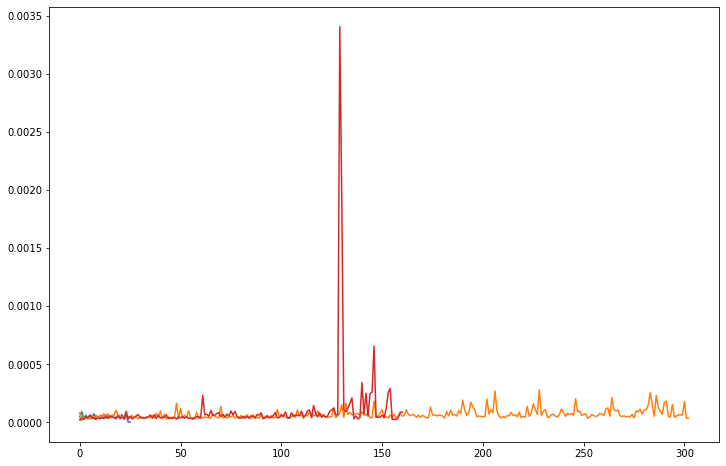

In [99]:
x1=[]
y1=[]
c=16646359
plt.figure(figsize=(12,8))
j=1
for i in range(len(x)):
    x1.append(x[i])
    y1.append(y[i])
    if x[i] == " FAIL":
        x1.append(x[i])
        y1.append(y[i])
#         plt.subplot(4,4,j)
        j+=1
        plt.plot(range(len(x1)),y1)
#         plt.xlim(3,2)
#         plt.ylim(1201450221,329364.6719038941)
#         plt.ylim(0.0001,0)
        c+=572
        x1.clear()
        y1.clear()

In [65]:
min(y1)

33.81422714547721

In [66]:
c=16646359
for i in range(x):
    plt.plot(range(len(x[i])),y[i],color='#'+str(dec2hex(c)))
    c+=572
plt.title(attribute+" mean")

TypeError: 'list' object cannot be interpreted as an integer

1553

In [ ]:
# 每次出错后当前点到错误点的平均图，可以是体积，面积，高度等
#颜色是由紫到黄0
def meanLine(attribute):
    B_data_mean=[]
    for i in range(len(B_data0810_error)):
        large=B_data0810_error[i][1]
        small=B_data0810_error[i][0]+1
        mean=[]
        if large-small<=1000:
            for i in range(large-small):
                mean.append(B_data0810[attribute].loc[small:small+i].mean())
        else:
            for i in range(1000):
                mean.append(B_data0810[attribute].loc[small:small+i].mean())
        B_data0810_mean.append(mean)

    c=16646359
    for i in range(len(B_data0810_error)):
        large=B_data0810_error[i][1]
        small=B_data0810_error[i][0]
        plt.plot(range(len(B_data0810_mean[i])),B_data0810_mean[i],color='#'+str(dec2hex(c)))
        c+=572
    plt.title(attribute+" mean")

In [267]:
base = [str(x) for x in range(10)] + [ chr(x) for x in range(ord('A'),ord('A')+6)]

def dec2hex(string_num):
    num = int(string_num)
    mid = []
    while True:
        if num == 0: break
        num,rem = divmod(num, 16)
        mid.append(base[rem])

    return ''.join([str(x) for x in mid[::-1]])

In [203]:
def pearson(p,q):
#只计算两者共同有的
    same = 0
    for i in p:
        if i in q:
            same +=1

    n = same
    #分别求p，q的和
    sumx = sum([p[i] for i in range(n)])
    sumy = sum([q[i] for i in range(n)])
    #分别求出p，q的平方和
    sumxsq = sum([p[i]**2 for i in range(n)])
    sumysq = sum([q[i]**2 for i in range(n)])
    #求出p，q的乘积和
    sumxy = sum([p[i]*q[i] for i in range(n)])
    # print sumxy
    #求出pearson相关系数
    up = sumxy - sumx*sumy/n
    down = ((sumxsq - pow(sumxsq,2)/n)*(sumysq - pow(sumysq,2)/n))**.5
    #若down为零则不能计算，return 0
    if down == 0 :return 0
    r = up/down
    return r

### T数据清洗

In [25]:
T_data=T_data[T_data["JOB"]=="GT30-V2.8-00-TOP-10"]

In [27]:
B_data

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C2,98.832,106.662,92.660,0.005,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
1,1:C2,95.402,100.189,95.222,0.000,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
2,1:C10,103.047,111.748,92.214,-0.011,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
3,1:C10,105.500,117.418,89.850,0.000,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
4,1:C11,103.741,117.714,88.129,-0.008,-0.006,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557875,1:VT3,113.166,110.799,102.136,-0.005,0.016,GOOD,10,2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44197,15:38:53,15:38:58
6557876,1:VT3,131.565,120.853,108.864,0.011,0.002,GOOD,10,2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44197,15:38:53,15:38:58
6557877,1:VT4,124.038,124.045,99.994,-0.015,0.008,GOOD,10,2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44197,15:38:53,15:38:58
6557878,1:VT4,92.592,88.401,104.741,-0.003,0.008,GOOD,10,2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44197,15:38:53,15:38:58


In [26]:
T_data

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,Image,DATE,JOBRESULT,ana1,ana2,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C1,109.000,110.091,99.008,-0.002,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
1,1:C1,104.116,116.925,89.045,-0.006,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
2,1:C3,109.883,115.214,95.373,0.003,0.001,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
3,1:C3,114.777,119.189,96.298,0.003,0.006,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
4,1:C4,114.009,115.141,99.017,-0.010,0.014,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8297435,1:X1,100.701,118.078,110.869,0.007,-0.009,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297436,1:X1,109.346,126.694,112.199,0.006,0.001,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297437,1:X1,109.792,130.359,109.489,0.002,-0.008,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297438,1:X1,107.749,126.283,110.921,0.007,0.003,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19


In [29]:
inx =[]
larger_num = []
new_sum = []
new_means = []
smallr_num = []
JOBRESULT=[]
Da = []
S_TIME =[]
for index ,values in T_data.groupby("BARCODE_INDEX"):
#     d[index]=values["Height(um)"].nlargest(3,keep='all').values
    JOBRESULT.append(values["JOBRESULT"].values[0])
#     print(values["Height(um)"])
    larger_num.append(values["Height(um)"].nlargest(10,keep='all').values)
    
    smallr_num.append(values["Height(um)"].nlargest(10,keep='all').values)
    inx.append(index)
    new_sum.append(values["Height(um)"].sum())
    new_means.append(values["Height(um)"].mean())
    Da.append(values["DATE"].values[0])
    S_TIME.append(values["S_TIME"].values[0])

In [30]:
d={
    "inx":inx,
    "larger_num":larger_num,
    "new_sum":new_sum,
    "new_means":new_means,
    "smallr_num":smallr_num,
    "JOBRESULT":JOBRESULT,
    "Da":Da,
    "S_TIME":S_TIME
}

In [31]:
d=pd.DataFrame(d)

In [32]:
d

,inx,larger_num,new_sum,new_means,smallr_num,JOBRESULT,Da,S_TIME
0,14063,"[159.739, 159.326, 149.436, 147.774, 147.594, ...",457809.821,115.317335,"[159.739, 159.326, 149.436, 147.774, 147.594, ...",PASS,2021/8/10,14:15:13
1,14064,"[150.058, 146.577, 146.225, 146.101, 145.248, ...",447085.909,112.616098,"[150.058, 146.577, 146.225, 146.101, 145.248, ...",GOOD,2021/8/10,14:15:35
2,14065,"[150.91, 149.559, 149.479, 149.231, 147.857, 1...",467510.075,117.760724,"[150.91, 149.559, 149.479, 149.231, 147.857, 1...",GOOD,2021/8/10,14:15:51
3,14066,"[149.702, 148.933, 147.268, 146.829, 145.827, ...",452269.376,113.921757,"[149.702, 148.933, 147.268, 146.829, 145.827, ...",GOOD,2021/8/10,14:16:59
4,14067,"[152.552, 150.729, 150.582, 149.859, 149.167, ...",467701.703,117.808993,"[152.552, 150.729, 150.582, 149.859, 149.167, ...",GOOD,2021/8/10,14:17:20
...,...,...,...,...,...,...,...,...
1865,44648,"[144.113, 141.568, 139.548, 138.181, 135.86, 1...",430844.867,108.525155,"[144.113, 141.568, 139.548, 138.181, 135.86, 1...",GOOD,2021/8/27,23:55:45
1866,44649,"[151.559, 151.454, 146.996, 146.75, 145.748, 1...",439537.848,110.714823,"[151.559, 151.454, 146.996, 146.75, 145.748, 1...",GOOD,2021/8/27,23:57:09
1867,44650,"[145.178, 143.14, 139.862, 139.418, 138.45, 13...",432065.309,108.832572,"[145.178, 143.14, 139.862, 139.418, 138.45, 13...",GOOD,2021/8/27,23:57:22
1868,44651,"[151.268, 145.694, 145.599, 144.944, 143.934, ...",435003.402,109.572645,"[151.268, 145.694, 145.599, 144.944, 143.934, ...",PASS,2021/8/27,23:58:46


In [33]:
d.to_csv("../../dataSet/gangwangT.csv",index= False)

In [34]:
dd=pd.read_csv("../../dataSet/gangwangT.csv")

In [35]:
dd

,inx,larger_num,new_sum,new_means,smallr_num,JOBRESULT,Da,S_TIME
0,14063,[159.739 159.326 149.436 147.774 147.594 147.0...,457809.821,115.317335,[159.739 159.326 149.436 147.774 147.594 147.0...,PASS,2021/8/10,14:15:13
1,14064,[150.058 146.577 146.225 146.101 145.248 144.6...,447085.909,112.616098,[150.058 146.577 146.225 146.101 145.248 144.6...,GOOD,2021/8/10,14:15:35
2,14065,[150.91 149.559 149.479 149.231 147.857 147.8...,467510.075,117.760724,[150.91 149.559 149.479 149.231 147.857 147.8...,GOOD,2021/8/10,14:15:51
3,14066,[149.702 148.933 147.268 146.829 145.827 145.4...,452269.376,113.921757,[149.702 148.933 147.268 146.829 145.827 145.4...,GOOD,2021/8/10,14:16:59
4,14067,[152.552 150.729 150.582 149.859 149.167 148.3...,467701.703,117.808993,[152.552 150.729 150.582 149.859 149.167 148.3...,GOOD,2021/8/10,14:17:20
...,...,...,...,...,...,...,...,...
1865,44648,[144.113 141.568 139.548 138.181 135.86 135.8...,430844.867,108.525155,[144.113 141.568 139.548 138.181 135.86 135.8...,GOOD,2021/8/27,23:55:45
1866,44649,[151.559 151.454 146.996 146.75 145.748 145.5...,439537.848,110.714823,[151.559 151.454 146.996 146.75 145.748 145.5...,GOOD,2021/8/27,23:57:09
1867,44650,[145.178 143.14 139.862 139.418 138.45 136.1...,432065.309,108.832572,[145.178 143.14 139.862 139.418 138.45 136.1...,GOOD,2021/8/27,23:57:22
1868,44651,[151.268 145.694 145.599 144.944 143.934 143.5...,435003.402,109.572645,[151.268 145.694 145.599 144.944 143.934 143.5...,PASS,2021/8/27,23:58:46


In [36]:
data=pd.concat([pd.DataFrame(larger_num),pd.DataFrame(smallr_num),dd],axis=1)

In [37]:
data

,0,1,2,3,4,5,6,7,8,9,...,9,10,inx,larger_num,new_sum,new_means,smallr_num,JOBRESULT,Da,S_TIME
0,159.739,159.326,149.436,147.774,147.594,147.027,146.146,145.989,145.745,145.272,...,145.272,NaN,14063,[159.739 159.326 149.436 147.774 147.594 147.0...,457809.821,115.317335,[159.739 159.326 149.436 147.774 147.594 147.0...,PASS,2021/8/10,14:15:13
1,150.058,146.577,146.225,146.101,145.248,144.625,144.388,143.860,143.372,143.013,...,143.013,NaN,14064,[150.058 146.577 146.225 146.101 145.248 144.6...,447085.909,112.616098,[150.058 146.577 146.225 146.101 145.248 144.6...,GOOD,2021/8/10,14:15:35
2,150.910,149.559,149.479,149.231,147.857,147.854,147.144,147.076,147.060,146.719,...,146.719,NaN,14065,[150.91 149.559 149.479 149.231 147.857 147.8...,467510.075,117.760724,[150.91 149.559 149.479 149.231 147.857 147.8...,GOOD,2021/8/10,14:15:51
3,149.702,148.933,147.268,146.829,145.827,145.478,144.514,144.458,144.105,144.049,...,144.049,NaN,14066,[149.702 148.933 147.268 146.829 145.827 145.4...,452269.376,113.921757,[149.702 148.933 147.268 146.829 145.827 145.4...,GOOD,2021/8/10,14:16:59
4,152.552,150.729,150.582,149.859,149.167,148.306,148.172,148.132,148.029,147.963,...,147.963,NaN,14067,[152.552 150.729 150.582 149.859 149.167 148.3...,467701.703,117.808993,[152.552 150.729 150.582 149.859 149.167 148.3...,GOOD,2021/8/10,14:17:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,144.113,141.568,139.548,138.181,135.860,135.852,134.624,134.616,134.519,134.502,...,134.502,NaN,44648,[144.113 141.568 139.548 138.181 135.86 135.8...,430844.867,108.525155,[144.113 141.568 139.548 138.181 135.86 135.8...,GOOD,2021/8/27,23:55:45
1866,151.559,151.454,146.996,146.750,145.748,145.554,145.442,145.176,145.145,144.926,...,144.926,NaN,44649,[151.559 151.454 146.996 146.75 145.748 145.5...,439537.848,110.714823,[151.559 151.454 146.996 146.75 145.748 145.5...,GOOD,2021/8/27,23:57:09
1867,145.178,143.140,139.862,139.418,138.450,136.108,136.086,135.894,135.835,135.706,...,135.706,NaN,44650,[145.178 143.14 139.862 139.418 138.45 136.1...,432065.309,108.832572,[145.178 143.14 139.862 139.418 138.45 136.1...,GOOD,2021/8/27,23:57:22
1868,151.268,145.694,145.599,144.944,143.934,143.557,143.241,143.177,142.325,142.214,...,142.214,NaN,44651,[151.268 145.694 145.599 144.944 143.934 143.5...,435003.402,109.572645,[151.268 145.694 145.599 144.944 143.934 143.5...,PASS,2021/8/27,23:58:46


In [38]:
data.drop(["larger_num","smallr_num"],axis=1,inplace=True)

In [40]:
data

,0,1,2,3,4,5,6,7,8,9,...,7,8,9,10,inx,new_sum,new_means,JOBRESULT,Da,S_TIME
0,159.739,159.326,149.436,147.774,147.594,147.027,146.146,145.989,145.745,145.272,...,145.989,145.745,145.272,NaN,14063,457809.821,115.317335,PASS,2021/8/10,14:15:13
1,150.058,146.577,146.225,146.101,145.248,144.625,144.388,143.860,143.372,143.013,...,143.860,143.372,143.013,NaN,14064,447085.909,112.616098,GOOD,2021/8/10,14:15:35
2,150.910,149.559,149.479,149.231,147.857,147.854,147.144,147.076,147.060,146.719,...,147.076,147.060,146.719,NaN,14065,467510.075,117.760724,GOOD,2021/8/10,14:15:51
3,149.702,148.933,147.268,146.829,145.827,145.478,144.514,144.458,144.105,144.049,...,144.458,144.105,144.049,NaN,14066,452269.376,113.921757,GOOD,2021/8/10,14:16:59
4,152.552,150.729,150.582,149.859,149.167,148.306,148.172,148.132,148.029,147.963,...,148.132,148.029,147.963,NaN,14067,467701.703,117.808993,GOOD,2021/8/10,14:17:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,144.113,141.568,139.548,138.181,135.860,135.852,134.624,134.616,134.519,134.502,...,134.616,134.519,134.502,NaN,44648,430844.867,108.525155,GOOD,2021/8/27,23:55:45
1866,151.559,151.454,146.996,146.750,145.748,145.554,145.442,145.176,145.145,144.926,...,145.176,145.145,144.926,NaN,44649,439537.848,110.714823,GOOD,2021/8/27,23:57:09
1867,145.178,143.140,139.862,139.418,138.450,136.108,136.086,135.894,135.835,135.706,...,135.894,135.835,135.706,NaN,44650,432065.309,108.832572,GOOD,2021/8/27,23:57:22
1868,151.268,145.694,145.599,144.944,143.934,143.557,143.241,143.177,142.325,142.214,...,143.177,142.325,142.214,NaN,44651,435003.402,109.572645,PASS,2021/8/27,23:58:46


In [43]:
data.columns=labels

In [45]:
data.isnull().sum()

max0            0
max1            0
max2            0
max3            0
max4            0
max5            0
max6            0
max7            0
max8            0
max9            0
max10        1868
min0            0
min1            0
min2            0
min3            0
min4            0
min5            0
min6            0
min7            0
min8            0
min9            0
min10        1868
inx             0
new_sum         0
new_means       0
JOBRESULT       0
Da              0
S_TIME          0
dtype: int64

In [46]:
data.drop(["max10","min10"],axis=1,inplace=True)

In [47]:
data

,max0,max1,max2,max3,max4,max5,max6,max7,max8,max9,...,min6,min7,min8,min9,inx,new_sum,new_means,JOBRESULT,Da,S_TIME
0,159.739,159.326,149.436,147.774,147.594,147.027,146.146,145.989,145.745,145.272,...,146.146,145.989,145.745,145.272,14063,457809.821,115.317335,PASS,2021/8/10,14:15:13
1,150.058,146.577,146.225,146.101,145.248,144.625,144.388,143.860,143.372,143.013,...,144.388,143.860,143.372,143.013,14064,447085.909,112.616098,GOOD,2021/8/10,14:15:35
2,150.910,149.559,149.479,149.231,147.857,147.854,147.144,147.076,147.060,146.719,...,147.144,147.076,147.060,146.719,14065,467510.075,117.760724,GOOD,2021/8/10,14:15:51
3,149.702,148.933,147.268,146.829,145.827,145.478,144.514,144.458,144.105,144.049,...,144.514,144.458,144.105,144.049,14066,452269.376,113.921757,GOOD,2021/8/10,14:16:59
4,152.552,150.729,150.582,149.859,149.167,148.306,148.172,148.132,148.029,147.963,...,148.172,148.132,148.029,147.963,14067,467701.703,117.808993,GOOD,2021/8/10,14:17:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,144.113,141.568,139.548,138.181,135.860,135.852,134.624,134.616,134.519,134.502,...,134.624,134.616,134.519,134.502,44648,430844.867,108.525155,GOOD,2021/8/27,23:55:45
1866,151.559,151.454,146.996,146.750,145.748,145.554,145.442,145.176,145.145,144.926,...,145.442,145.176,145.145,144.926,44649,439537.848,110.714823,GOOD,2021/8/27,23:57:09
1867,145.178,143.140,139.862,139.418,138.450,136.108,136.086,135.894,135.835,135.706,...,136.086,135.894,135.835,135.706,44650,432065.309,108.832572,GOOD,2021/8/27,23:57:22
1868,151.268,145.694,145.599,144.944,143.934,143.557,143.241,143.177,142.325,142.214,...,143.241,143.177,142.325,142.214,44651,435003.402,109.572645,PASS,2021/8/27,23:58:46


In [48]:
data.to_csv("../../dataSet/qingxiT.csv",index=False)

In [ ]:
B_data["Result"]=B_data["Result"].apply(lambda x: 1 if x=="GOOD"  else 0)
T_data["Result"]=T_data["Result"].apply(lambda x: 1 if x=="GOOD"  else 0)